CodeAlpha - Task1 - Titanic Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
ds = pd.read_csv("titanic.csv")

# Display the first few rows of the dataset
print(ds.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Data Preprocessing

In [6]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [8]:
for i in ds.columns:
    if ds[f"{i}"].sum()==0:
        ds.drop(f"{i}", axis=1, inplace=True)
ds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [10]:
ds.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [11]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
ds.fillna(ds.Embarked.mean(), inplace = True)
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

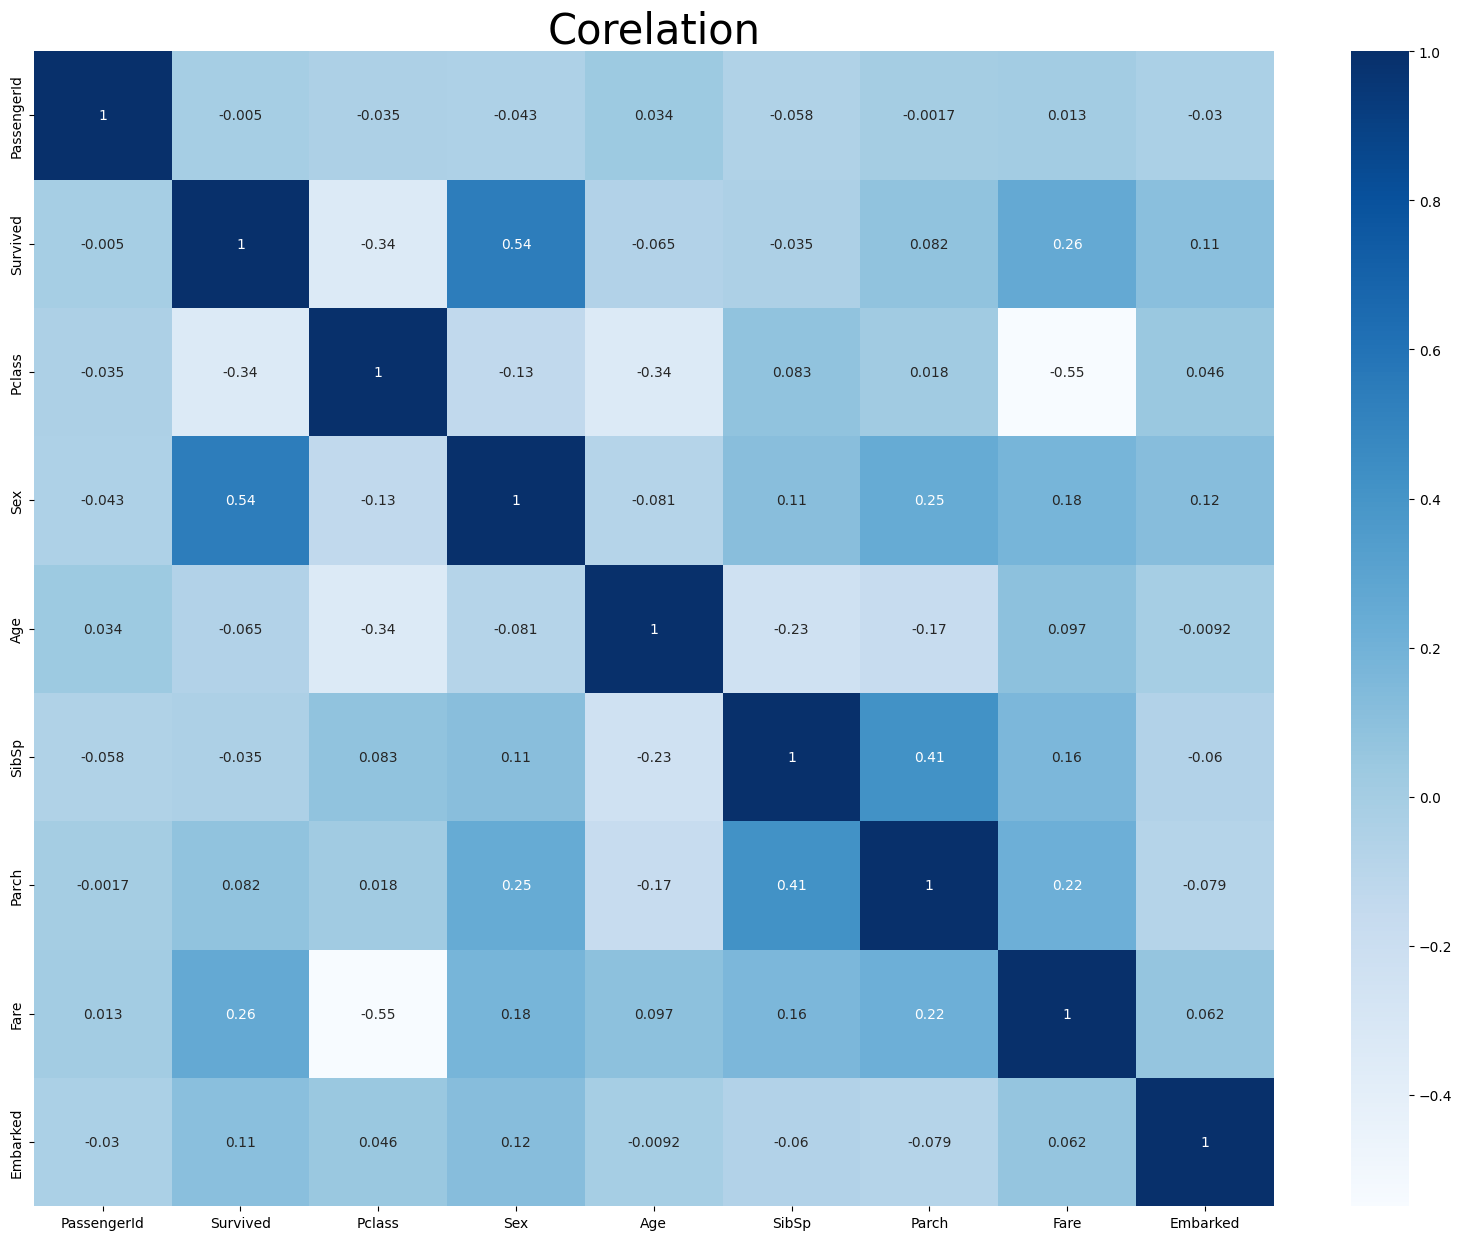

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(ds.corr(), annot=True, cmap='Blues')
plt.title("Corelation", size=30)
plt.show()

In [14]:
ds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


Logistic Regression

Logistic Regression
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



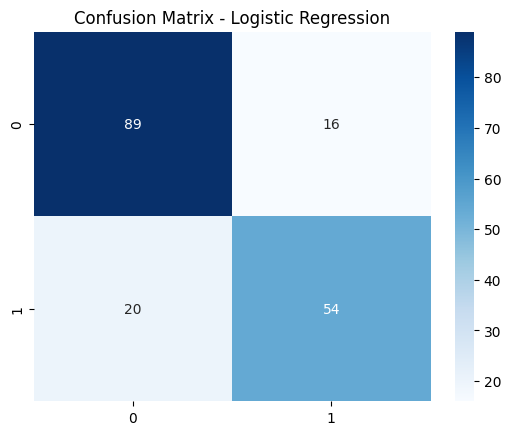

In [22]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

 Decision Tree

Decision Tree
Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



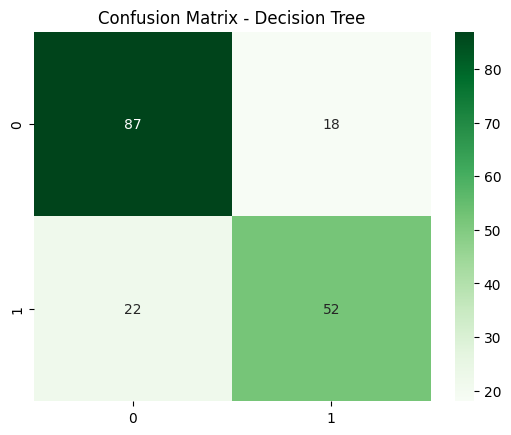

In [20]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Evaluation
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

 Random Forest

Random Forest
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



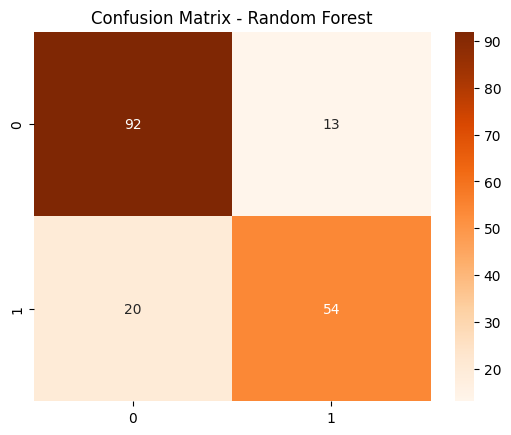

In [23]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Visualization

Pie Chart - Survival Rate

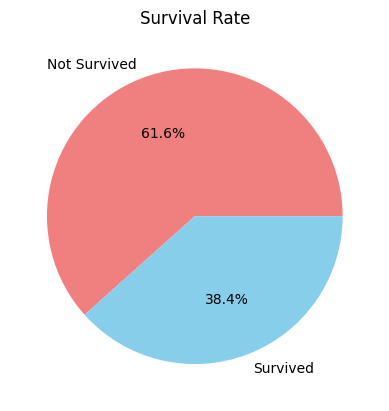

In [25]:
# Pie chart of survival rate
survived_counts = ds['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Survival Rate')
plt.show()

Donut Chart - Gender Distribution

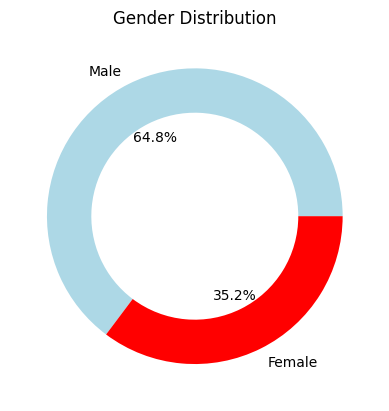

In [28]:
# Donut chart of gender distribution
gender_counts = ds['Sex'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'Red'], wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')
plt.show()

Scatter Plot - Age vs. Fare

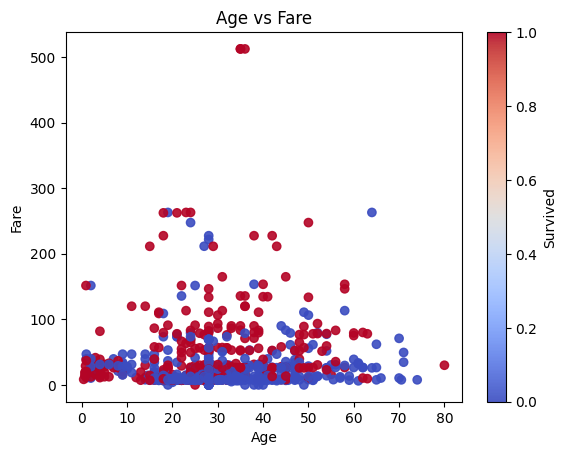

In [30]:
# Scatter plot of Age vs Fare
plt.scatter(ds['Age'], ds['Fare'], c=ds['Survived'], cmap='coolwarm', alpha=0.9)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived')
plt.show()

In [34]:
# Sample DataFrame (assuming `ds` is already defined)
# Check column names and initial rows to ensure they are correct
print("Column Names:")
print(ds.columns)
print("\nSample Data:")
print(ds.head())

Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Sample Data:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
2            3         1       3    1  26.0      0      0   7.9250         0
4            5         0       3    0  35.0      0      0   8.0500         0
5            6         0       3    0  28.0      0      0   8.4583         2
7            8         0       3    0   2.0      3      1  21.0750         0


In [37]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

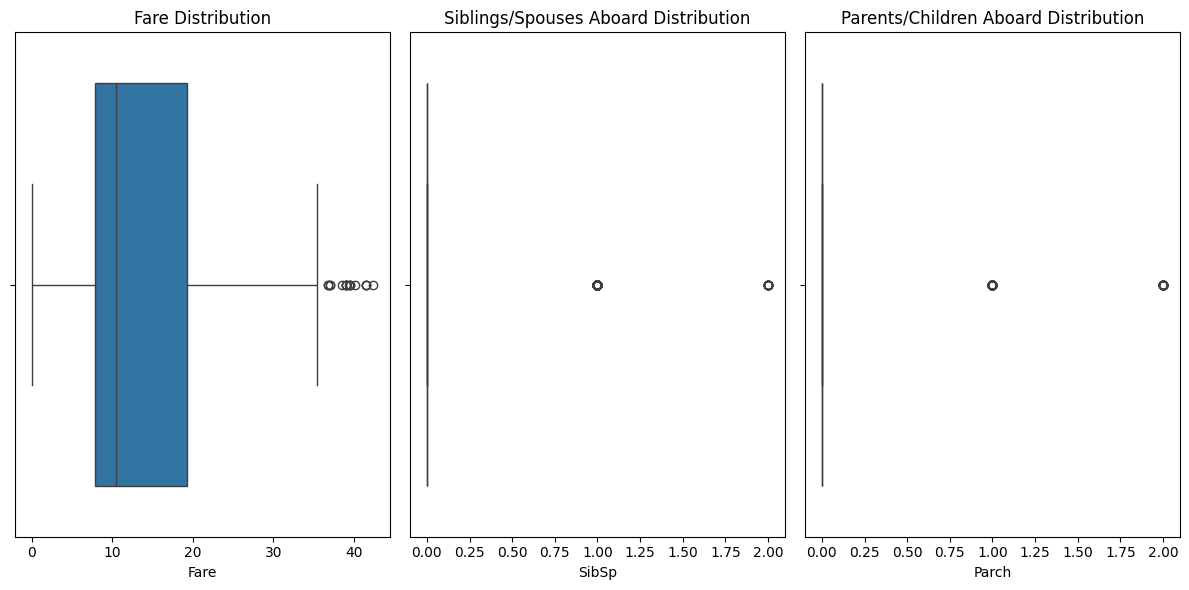

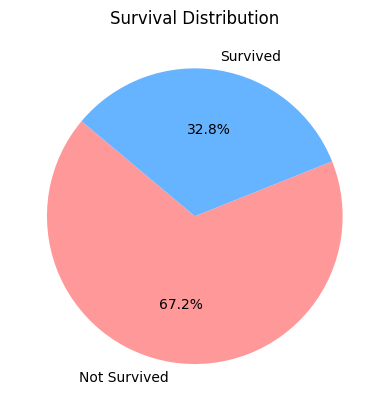

In [38]:
# Dropping outliers
ds = ds[ds['Fare'] < 45]
ds = ds[ds['SibSp'] < 3]  # Changed 'sibsp' to 'SibSp'
ds = ds[ds['Parch'] < 3]

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))

# Boxplot for 'Fare'
plt.subplot(1, 3, 1)
sns.boxplot(x=ds['Fare'])
plt.title('Fare Distribution')

# Boxplot for 'SibSp'
plt.subplot(1, 3, 2)
sns.boxplot(x=ds['SibSp'])  # Changed 'sibsp' to 'SibSp'
plt.title('Siblings/Spouses Aboard Distribution')

# Boxplot for 'Parch'
plt.subplot(1, 3, 3)
sns.boxplot(x=ds['Parch'])
plt.title('Parents/Children Aboard Distribution')

plt.tight_layout()
plt.show()

# Pie chart for target variable distribution
labels = ['Not Survived', 'Survived']
sizes = ds['Survived'].value_counts()  # Assuming '2urvived' should be 'Survived'
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Survived' is the target variable and others are features
X = ds.drop('Survived', axis=1)
y = ds['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8602941176470589
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90        90
           1       0.83      0.74      0.78        46

    accuracy                           0.86       136
   macro avg       0.85      0.83      0.84       136
weighted avg       0.86      0.86      0.86       136



In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7352941176470589
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        90
           1       0.61      0.59      0.60        46

    accuracy                           0.74       136
   macro avg       0.70      0.70      0.70       136
weighted avg       0.73      0.74      0.73       136



In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8676470588235294
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        90
           1       0.91      0.67      0.78        46

    accuracy                           0.87       136
   macro avg       0.88      0.82      0.84       136
weighted avg       0.87      0.87      0.86       136

